## Saurabh Dadhich
### Indian Institute of Technology, Roorkee

## Multi-Class dry bean classification: 

### Importing Packages: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from keras.layers import InputLayer,BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


### Loading data: 

In [2]:
database = pd.read_excel(r"Dry_Bean_Dataset.xlsx") 
print("Shape of database: ",database.shape)

Shape of database:  (13611, 17)


### Understanding database: 

In [3]:
print(database.columns,'\n')
print(database.isnull().sum())

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object') 

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [4]:
database.describe() 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
database.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# Shuffling dataframe:
database = database.sample(frac=1).reset_index(drop=True) 
# drop=True prevents reset_index from creating a column containing the old index entries.
database.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,35972,685.989,233.492969,196.292212,1.189517,0.541537,36336,214.011619,0.761570,0.989982,0.960595,0.916566,0.006491,0.002826,0.840092,0.999304,SEKER
1,64652,978.747,376.212800,219.293761,1.715565,0.812545,65266,286.910235,0.792965,0.990592,0.848108,0.762628,0.005819,0.001214,0.581601,0.997774,CALI
2,79319,1078.159,420.141999,242.072247,1.735606,0.817332,80092,317.792523,0.738401,0.990349,0.857475,0.756393,0.005297,0.001070,0.572131,0.992993,CALI
3,94276,1160.889,445.584193,271.786544,1.639464,0.792436,95109,346.462020,0.827200,0.991242,0.879082,0.777546,0.004726,0.001066,0.604577,0.991182,CALI
4,79866,1106.470,430.939924,239.504320,1.799299,0.831335,81633,318.886421,0.787649,0.978354,0.819771,0.739979,0.005396,0.000998,0.547569,0.985240,CALI


### Classes Distribution:

Classes count:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


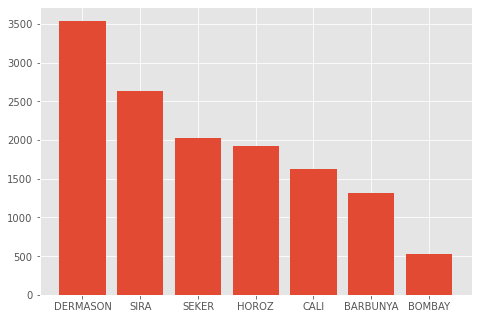

In [50]:
classes_count = database['Class'].value_counts()           # return series 
print('Classes count:')
print(classes_count)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classes_count.index,classes_count)
plt.show()

In [7]:
data_Y = database['Class'].copy()
data_X = database.drop('Class',axis = 1)   # return numpy

### One hot encoding: 

In [8]:
lb = LabelBinarizer() 
data_Y = lb.fit_transform(data_Y)                 # return numpy array by default
print(data_Y.shape)   

(13611, 7)


In [9]:
print(data_Y[0:5])

[[0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]


### Train Test split: 

In [10]:
(train_X, test_X, train_Y, test_Y) = train_test_split(data_X,data_Y,test_size=0.20,shuffle=True,stratify=data_Y, random_state=42)

In [11]:
print("Shape of train_X: ", train_X.shape)
print("Shape of train_Y: ", train_Y.shape)
print("Shape of test_X: ", test_X.shape)
print("Shape of test_Y: ", test_Y.shape)

Shape of train_X:  (10888, 16)
Shape of train_Y:  (10888, 7)
Shape of test_X:  (2723, 16)
Shape of test_Y:  (2723, 7)


### Scaling and Normalization Data: 

In [12]:
scaler = StandardScaler()
train_X = scaler.inverse_transform(scaler.fit_transform(train_X)) 
test_X = scaler.inverse_transform(scaler.fit_transform(test_X)) 

In [13]:
print(train_X.shape, test_X.shape) 

(10888, 16) (2723, 16)


### Model Architecture: 

In [27]:
model = Sequential()
model.add(InputLayer(input_shape=(16,)))  
model.add(Dense(256))
model.add(BatchNormalization())  
model.add(Activation('relu'))
model.add(Dropout(0.3))  
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))  
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(64)) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.3))
model.add(Dense(32))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(16)) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.2))  
model.add(Dense(7,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               4352      
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)              

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [30]:
history = model.fit(train_X, train_Y, 
                    batch_size = 64, 
                    epochs=20,    
                    validation_split=0.18) 

Train on 8928 samples, validate on 1960 samples
Epoch 1/20
8928/8928 [==============================] - 1s 81us/step - loss: 0.3879 - accuracy: 0.8697 - val_loss: 1.0494 - val_accuracy: 0.6408
Epoch 2/20
8928/8928 [==============================] - 1s 78us/step - loss: 0.3852 - accuracy: 0.8748 - val_loss: 0.4266 - val_accuracy: 0.8378
Epoch 3/20
8928/8928 [==============================] - 1s 80us/step - loss: 0.3766 - accuracy: 0.8744 - val_loss: 0.3878 - val_accuracy: 0.8842
Epoch 4/20
8928/8928 [==============================] - 1s 72us/step - loss: 0.3761 - accuracy: 0.8714 - val_loss: 0.5380 - val_accuracy: 0.7235
Epoch 5/20
8928/8928 [==============================] - 1s 70us/step - loss: 0.3833 - accuracy: 0.8702 - val_loss: 0.9129 - val_accuracy: 0.6031
Epoch 6/20
8928/8928 [==============================] - 1s 69us/step - loss: 0.3779 - accuracy: 0.8707 - val_loss: 0.5737 - val_accuracy: 0.7418
Epoch 7/20
8928/8928 [==============================] - 1s 76us/step - loss: 0.387

### Total Epochs done: 720

In [34]:
score, acc = model.evaluate(test_X, test_Y,batch_size=64, verbose=2)

In [35]:
print("Accuracy on Test Set: ", acc) 

Accuracy on Test Set:  0.8391479849815369


### Saving Model:

In [36]:
model.save("Bean_Classification_model") 

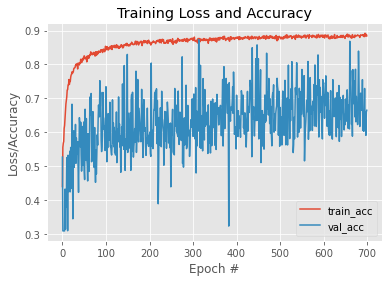

In [20]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right") 
plt.savefig("Accuracy plot.png")